# Oracle Cloud Infrastructure Python SDK

Eine Library um mit der Oracle Cloud zu interagieren und demnach auch mit dem Object Storage. Dieser Ansatz ist auch als Skriptsprache, Java etc. möglich.

Weitere Informationen unter: https://github.com/oracle/oci-python-sdk

In [29]:
import oci
import io
from io import StringIO
import pandas as pd
from PIL import Image

Die SDK benötigt eine Konfigurationsdatei, um sich mit der Cloud Umgebung verbinden zu können. 
 
Es benötigt: 

* ID of user and tenancy
* Region
* Fingerpring and path of the private key (API key)
* Region

In [20]:
config = oci.config.from_file("/home/oracle/.oci/config", "DEFAULT")
print(config)

{'log_requests': False, 'additional_user_agent': '', 'pass_phrase': 'Aths', 'user': 'ocid1.user.oc1..aaaaaaaarz3j2ei2nubmaymhcykqjh5sopjzkaq2idzqgxddfmqbbvd63yma', 'fingerprint': '4d:8d:94:a5:4e:a7:85:63:5c:de:09:08:4a:47:2e:39', 'key_file': '/home/oracle/.oci/oci_api_key.pem', 'tenancy': 'ocid1.tenancy.oc1..aaaaaaaap7sg74i4ibhxz7ymmv343ztoyytoi3sp5bwj4r6ydz6fscx6nuka', 'region': 'eu-frankfurt-1'}


In [21]:
print("Pass_Phrase: ",config['pass_phrase'])
print("User ID: ",config['user'])
print("Tenancy: ",config['tenancy'])
print("Region: ",config['region'])


Pass_Phrase:  Aths
User ID:  ocid1.user.oc1..aaaaaaaarz3j2ei2nubmaymhcykqjh5sopjzkaq2idzqgxddfmqbbvd63yma
Tenancy:  ocid1.tenancy.oc1..aaaaaaaap7sg74i4ibhxz7ymmv343ztoyytoi3sp5bwj4r6ydz6fscx6nuka
Region:  eu-frankfurt-1


Sind wir im richtigen Kompartment und Tenancy (Namespace)?

Zudem erstellen wir ein Object Storage Objekt, welches als Schnittstelle zum Object Storage dient. 

In [22]:
compartment_id = config["tenancy"]
print("root-compartment_id:  ->",compartment_id)
object_storage = oci.object_storage.ObjectStorageClient(config)
print("object_storage: ->", object_storage)
namespace = object_storage.get_namespace().data
print("namespace: ->",namespace)

root-compartment_id:  -> ocid1.tenancy.oc1..aaaaaaaap7sg74i4ibhxz7ymmv343ztoyytoi3sp5bwj4r6ydz6fscx6nuka
object_storage: -> <oci.object_storage.object_storage_client.ObjectStorageClient object at 0x7f764d1dcb38>
namespace: -> oraseemeadesandbox


Der Object Storage hat eine Bucket Strukture. Wir müssen demnach den Bucket-Namen angeben. 

In [23]:
bucket_name = "seminar"
bucket = object_storage.get_bucket(namespace, bucket_name)
type(bucket)

oci.response.Response

Auflisten der Dateien in dem angegebenen Bucket. 

In [24]:
object_list = object_storage.list_objects(namespace, bucket_name)
for o in object_list.data.objects:
    print(o.name)

ADB-Snowflake-Overview-V1.pptx
D_KUNDE.dsv
Einwanderung_Deutschland.csv
Katze.png
Kosten_PKW.csv
Mon_Temp.csv
boston_house_prices.csv
iris.csv
trousers_1.jpg
wisc_bc_data.csv


# CSV

In [26]:
#o Kunde_DSV
object_name = "D_KUNDE.dsv"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

In [27]:
print(type(chunktest))
chunktest[0:200]

<class 'bytes'>


b'"","KUNDEN_NR","KD_GRUPPEN_NR","VORNAME","NACHNAME","ANREDE","LEBENSALTER","GESCHLECHT","STAND","WOHNART_NR","BILDUNGS_NR","GEHALT","BERUFSGRUPPEN_NR","EIGENTUM","ANZ_KINDER","BERUF_NR","KRITISCHER_KU'

In [30]:
s=str(chunktest,'ISO-8859-1')
data = StringIO(s)
print(type(data))
contents = data.getvalue()
contents[0:200]

<class '_io.StringIO'>


'"","KUNDEN_NR","KD_GRUPPEN_NR","VORNAME","NACHNAME","ANREDE","LEBENSALTER","GESCHLECHT","STAND","WOHNART_NR","BILDUNGS_NR","GEHALT","BERUFSGRUPPEN_NR","EIGENTUM","ANZ_KINDER","BERUF_NR","KRITISCHER_KU'

In [31]:
df=pd.read_csv(data)

In [32]:
df.head()

Unnamed: 0  KUNDEN_NR  KD_GRUPPEN_NR  VORNAME       NACHNAME ANREDE  \
0           1          1              1  Hiltrud           Pein   Frau   
1           2          2              1   Ortrud          Karlo   Frau   
2           3          3              1   Svenja  Fruechtenicht   Frau   
3           4          4              1     Olga           Bach   Frau   
4           5          5              1   Svenja   Messerschmid   Frau   

   LEBENSALTER  GESCHLECHT  STAND  WOHNART_NR  ...  BONITAET  KREDITFAEHIG  \
0           21           1      1           3  ...         4             0   
1           18           1      1           3  ...         3             0   
2           20           1      1           4  ...         3             0   
3           24           1      1           3  ...         3             0   
4           21           1      1           1  ...         3             0   

   SCHNAEPPCHENJAEGER  GEHOBENER_PREIS_KUNDE  NIEDRIG_PREIS_KUNDE  KUNDENTYP  \
0                   0                      0                    0          0   
1                   1                      0                    0          0   
2                   0                      0                    0          0   
3                   0                      0                    0          0   
4                   0                      0                    0          0   

   BERUFSKLASSE  ANZAHL_WERBUNG_MONAT  FREQUENZ_BESUCHE_MONAT   Gen_Datum  
0             1                     5                      11  2017-06-13  
1             1                     3                       7  2017-06-13  
2             1                     4                      11  2017-06-13  
3             1                     5                      11  2017-06-13  
4             1                     3                       8  2017-06-13  

[5 rows x 43 columns]

Lass uns zunächst ein CSV File aus dem Object Storage laden. 

In [25]:
#object_name = "bag01.jpg"
object_name = "boston_house_prices.csv"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

Das CSV lieft zunächst in Byte Format vor. 

In [39]:
print(type(chunktest))
chunktest[0:200]

<class 'bytes'>


b'"CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,2'

Mit IO Strings können wir die Daten mit Pandas einlesen. 

In [40]:
s=str(chunktest,'utf-8')
data = StringIO(s)
print(type(data))
contents = data.getvalue()
contents[0:200]

<class '_io.StringIO'>


'"CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,2'

In [41]:
df=pd.read_csv(data)

In [42]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

## Bilder

Nun ein Bildbeispiel. Wir müssen hier mit ByteIO arbeiten, um das Bild zu öffnen und einzulesen.

In [43]:
object_name = "trousers_1.jpg"
#object_name = "newtest.txt"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

In [44]:
imageStream = io.BytesIO(chunktest)
imageFile = Image.open(imageStream)
print(type(imageFile))
print(imageFile.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(202, 250)


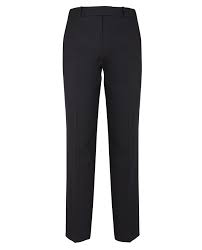

In [45]:
imageFile